##**9.2 가우시안 혼합**
가우시안 혼합모델(GMM) : 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

- 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성(타원형)
- 각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다름


**GaussianMixture**
- 샘플마다 k개의 클러스터에서 랜덤하게 한 클러스터가 선택됨. j번째 클러스터를 선택할 확률은 클러스터의 가중치로 정의됨. i번째 샘플을 위해 선택한 클러스터 인덱스는 z로 표시

- z=j 이면, i번째 클러스터에 할당되었다면 이 샘플의 위치 x는 평균이 $𝝁$ 이고 공분산 행렬이 $𝞢$ 인 가우시안 분포에서 랜덤하게 샘플링

$$x^{(i)}~N(\mu^{(j)},𝚺^{(j)}) $$



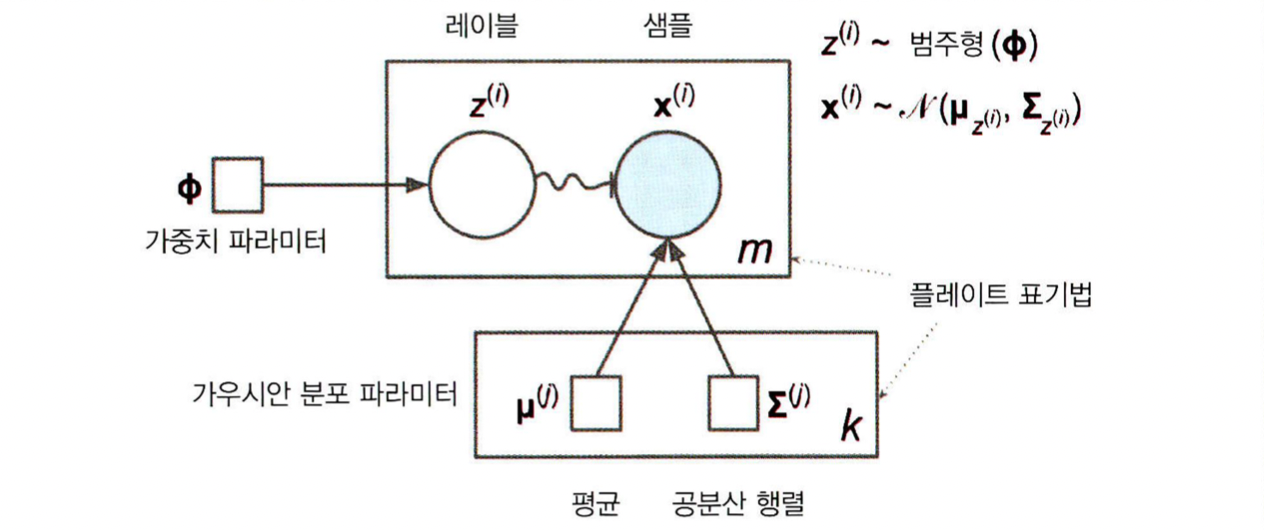

- 원은 확률 변수를 나타냄
- 사각형은 고정값을 나타냄(모델의 파라미터)
- 큰 사각형을 플레이트라고 부름, 이 사각형 안의 내용이 여러 번 반복됨
- 플레이트 오른쪽 아래 숫자 : 플레이트 안 내용의 반복 횟수


In [ ]:
#데이터 생성 코드

from sklearn.datasets import make_blobs
import numpy as np


blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [ ]:
gm.weights_

array([0.19978216, 0.20032189, 0.59989596])

In [ ]:
gm.means_

array([[-1.48543693,  2.28573643],
       [ 0.19937187,  2.25813691],
       [-2.80278963,  1.96665812]])

In [ ]:
gm.covariances_

array([[[ 8.79984367e-02,  1.46541758e-04],
        [ 1.46541758e-04,  9.01630979e-02]],

       [[ 1.46166449e-01, -4.84946828e-03],
        [-4.84946828e-03,  1.56280672e-01]],

       [[ 9.95376970e-03,  7.16529541e-04],
        [ 7.16529541e-04,  3.96947649e-01]]])

- **기댓값-최대화(EM) 알고리즘**
  - k-평균 알고리즘과 공통점이 많다
  - 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복
    - **기댓값 단계** : 샘플을 클러스터에 할당
    - **최대화 단계** : 클러스터를 업데이트
  - EM을 클러스터 중심 ($𝝁^{(1)}$ 에서 $𝝁^{(k)}$)뿐만 아니라 크기, 모양, 방향($\Sigma^{(1)}$ 에서 $\Sigma^{(k)}$까지)과 클러스터의 상대적 가중치 ($Φ^{(1)}$ 에서 $Φ^{(k)}$까지)를 찾는 k-평균의 일반화
  - 소프트 클러스터 할당(각 클러스터에 확률(샘플에 대한 클러스터의 ***책임***) 예측, 추정 확률로 샘플에 가중치가 적용)

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

3

- 하드 군집 : 새로운 샘플을 가장 비슷한 클러스터에 할당
  - `predict()`
- 소프트 군집 : 특정 클러스터에 속할 확률을 예측
  - `predict_proba()`

In [ ]:
gm.predict(X)

array([2, 2, 1, ..., 2, 1, 2])

In [ ]:
gm.predict_proba(X)

array([[1.19140197e-006, 5.11211601e-015, 9.99998809e-001],
       [1.56262666e-006, 6.43557803e-016, 9.99998437e-001],
       [7.51207529e-016, 1.00000000e+000, 4.58103106e-307],
       ...,
       [8.44387449e-006, 7.53349575e-015, 9.99991556e-001],
       [7.54961300e-008, 9.99999925e-001, 6.39866293e-202],
       [2.66779387e-004, 3.59569371e-013, 9.99733221e-001]])

- GM은 생성 모델(generative model)
  - 모델에서 새로운 샘픙르 만들 수 있음
  - 반환된 샘플은 클러스터 인덱스 순으로 정렬되어 있음

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-1.48100831,  2.84190825],
       [ 0.09474182,  1.91294629],
       [-3.02778244,  1.15948374],
       [-3.00614132,  1.34259249],
       [-2.83002878,  2.32985871],
       [-2.75856753,  2.54179697]])

In [ ]:
y_new

array([0, 1, 2, 2, 2, 2])

- `score_samples()`
  - 주어진 위치에서 모델의 밀도 추정
  - 샘플이 주어지면 이 메서드는 그 위치의 확률 밀도 함수(PDF)의 로그를 예측
    - 점수의 지수값으로 계산
  - 점수가 높을수록 밀도가 높음
  - 샘플이 특정 지역 안에 속할 확률은 pdf 적분

In [ ]:
gm.score_samples(X)

array([-0.62897413,  0.13004267, -7.15363365, ..., -0.3150245 ,
       -1.62809493, -0.94509528])

- 파라미터 조정(클러스터의 모양, 방향, 범위 제한)
- `covariance_type` 설정
  - `full` : 기본값, 제약 없음
  - `spherical` : 모든 클러스터가 원형
  - `diag` : 클러스터는 크기에 상관없이 어떤 타원형도 가능, 타원의 축은 좌표 축과 나란해야 함 (공분산 행렬이 대각 행렬이어야 함)
  - `tied` : 모든 클러스터가 동일한 타원 모양, 크기, 방향

###**9.2.1 가우시안 혼합을 사용한 이상치 탐지**
- 이상치(outlier) : 보통과 많이 다른 샘플
- 다양한 애플리케이션에서 사용
  - 부정 거래 감지, 제조 결함이 있는 제품 감지에 이용
  - 다른 모델을 훈련하기 전 데이터셋에서 이상치 제거하는 데 사용

- 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있음
  - 임곗값 조절 : 거짓 양성이 너무 많다면 낮추고 거짓 음성이 너무 많다면 높임

In [ ]:
# 네번째 백분위수(4%)를 밀도 임곗값으로 사용
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

- 특이치 탐지(novelty detection)
  - 이상치로 오염되지 않은 깨끗한 데이터셋에서 훈련
  

###**9.2.2 클러스터 개수 선택하기**
- 이론적 정보 기준(theoretical information criterion)
  - BIC(Bayesian information criterion)
  $$ BIC = log(m)p - 2log(L̃)$$

  - AIC(Akaike information criterion)
  $$ AIC = 2p - 2log(L̃)$$

  - m : 샘플의 개수
  - p : 모델이 학습할 파라미터 개수
  - $L̃$ : 모델의 가능도 함수의 최댓값

- 학습할 파라미터가 많은 모델에게 벌칙, 잘 학습하는 모델에게 보상
- 선택이 다른 경우 BIC가 선택한 모델이 간단한 경향



In [ ]:
gm.bic(X)

5168.669155929094

In [ ]:
gm.aic(X)

5073.453814116879



> **가능도 함수**
- **확률** : 출력이 얼마나 그럴듯한지
- **가능도** : 출력을 알고 있을 때 특정 파라미터 값이 얼마나 그럴듯한지



###**9.2.3 베이즈 가우시안 혼합 모델**
- BayesianGaussianMixture
  - 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만듬
  - n_components : 클러스터 개수
    - 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_,2)

array([0.2, 0.2, 0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ])

- 클러스터 파라미터(가중치, 평균, 공분산 행렬 등) : 잠재 확률 변수로 취급
  - z는 클러스터 파라미터와 클러스터 할당을 모두 포함
- 베타 분포 : 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용
  - 0에서 1 범위

###**9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘**
- PCA
  - 이상치 탐지에 유용
- Fast-MCD(minimum covariance determinant)

  정상치가 하나의 가우시안 분포에서 생성되었다고 가정하고,가우시안 분포의 파라미터를 추정할 때 이상치로 의심되는 샘플을 무시한다.
  - 이상치 탐지에 유용

- 아이솔레이션 포레스트

  각 노드에서 특성을 랜덤하게 선택한 다음(최솟값과 최댓값 사이에서) 랜덤한 임곗값을 골라 데이터셋을 둘로 나눈다. 이런 식으로 데이터셋은 점차 분리되어 모든 샘플이 다른 샘플과 격리될 때까지 진행한다. 이상치는 일반적으로 다른 샘플과 멀리 떨어져있으므로 평균적으로 정상 샘플과 적은 단계에서 격리된다.
  - 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘
  - 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트를 만듬
  
- LOF(local outlier factor)
  - 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교
  - k개의 최근접 이웃보다 더 격리됨
- one-class SVM

  원본 공간으로부터 고차원 공간에 있는 샘플을 분리, 원본 공간에서는 모든 샘플을 둘러싼 작은 영역을 찾는다. 새로운 샘플이 이 영역 안에 놓이지 않는다면 이상치
  - 특이치 탐지에 유용
  - 고차원 데이터셋에 잘 작동
  - 대규모 데이터셋으로의 확장은 어려움
